In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
#Load our stock market data
data = pd.read_csv('prices.csv', index_col=False)
df_og = pd.DataFrame(data)

df_og.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [195]:
#Data stats
df_og.nunique()

date        3524
symbol       501
open       72707
close      73628
low        72900
high       73299
volume    171073
dtype: int64

In [201]:
#Remove all data that isnt related to Chipotle Mexican Grill (Symbol: CMG)
df = df_og[df_og.symbol == 'CMG']

#Reset the index to be sequential
df = df.reset_index(drop=True)
df.head()
#Now we can work with this..

,date,symbol,open,close,low,high,volume
0,2010-01-04,CMG,89.599998,87.839996,87.180000,89.599998,313900.0
1,2010-01-05,CMG,87.519997,89.019997,87.110001,90.000000,511000.0
2,2010-01-06,CMG,88.589996,87.320000,86.599998,89.599998,282900.0
3,2010-01-07,CMG,87.339996,86.430000,86.000000,88.110001,422500.0
4,2010-01-08,CMG,90.570000,91.889999,90.000000,92.730003,1196400.0


In [202]:
#Round decimals here to better reflect dollar values
df = np.round(df, decimals=2)
df.head()

#Incase we need it this data starts January, 4th 2010 and ends.. Dec 30th, 2016
df.tail()

,date,symbol,open,close,low,high,volume
1757,2016-12-23,CMG,390.79,389.77,388.59,394.28,483100.0
1758,2016-12-27,CMG,388.52,388.75,388.02,392.33,550700.0
1759,2016-12-28,CMG,389.60,385.37,385.16,390.88,492300.0
1760,2016-12-29,CMG,385.57,376.61,375.13,387.00,866900.0
1761,2016-12-30,CMG,376.52,377.32,375.16,382.49,888100.0


In [242]:
#Lets count all the unique values
categorical = df.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

date
1762
symbol
1


In [341]:
summ = df.high - df.low
df['range'] = summ

df.head()

,date,symbol,open,close,low,high,volume,range
0,2010-01-04,CMG,89.60,87.84,87.18,89.60,313900.0,2.42
1,2010-01-05,CMG,87.52,89.02,87.11,90.00,511000.0,2.89
2,2010-01-06,CMG,88.59,87.32,86.60,89.60,282900.0,3.00
3,2010-01-07,CMG,87.34,86.43,86.00,88.11,422500.0,2.11
4,2010-01-08,CMG,90.57,91.89,90.00,92.73,1196400.0,2.73


In [286]:
#Load in modelling 
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df.drop(['close', 'date', 'symbol', 'open', 'volume'], 1)
Y = df['close']

Y_test_size = Y_test.size
Y_train_size = Y_train.size

rfc = ensemble.RandomForestRegressor()

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.10, random_state=42)

rfc.fit(X_train, Y_train)


accu_train = rfc.score(X_train, Y_train)
accu_test = rfc.score(X_test, Y_test)

print("Accuracy on Train: ", accu_train)
print("Accuracy on Test: ", accu_test)


Accuracy on Train:  0.9998924680573434
Accuracy on Test:  0.9990664830322651


In [275]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestRegressor()
X = df.drop(['close', 'date', 'symbol', 'open', 'volume'], 1)
Y = df['close']
X = X.dropna(axis=1)
# rfc.fit(X,Y)
(cross_val_score(rfc, X, Y, cv=25))

array([-3.36717007,  0.52396143,  0.46751893,  0.91346756,  0.95956403,
        0.95698426,  0.90184937,  0.99238693,  0.92661186,  0.98335111,
        0.97712048,  0.98398904,  0.98362459,  0.99515979,  0.98045728,
        0.97291196,  0.98041023,  0.95645701,  0.96423017,  0.99380239,
        0.98517689,  0.9715833 ,  0.96094593,  0.90335093,  0.95950598])

In [337]:
X.head()

,low,high,range
0,87.18,89.60,2.42
1,87.11,90.00,2.89
2,86.60,89.60,3.00
3,86.00,88.11,2.11
4,90.00,92.73,2.73


In [291]:
rfc.predict([[234, 241, 7]])

array([236.645])

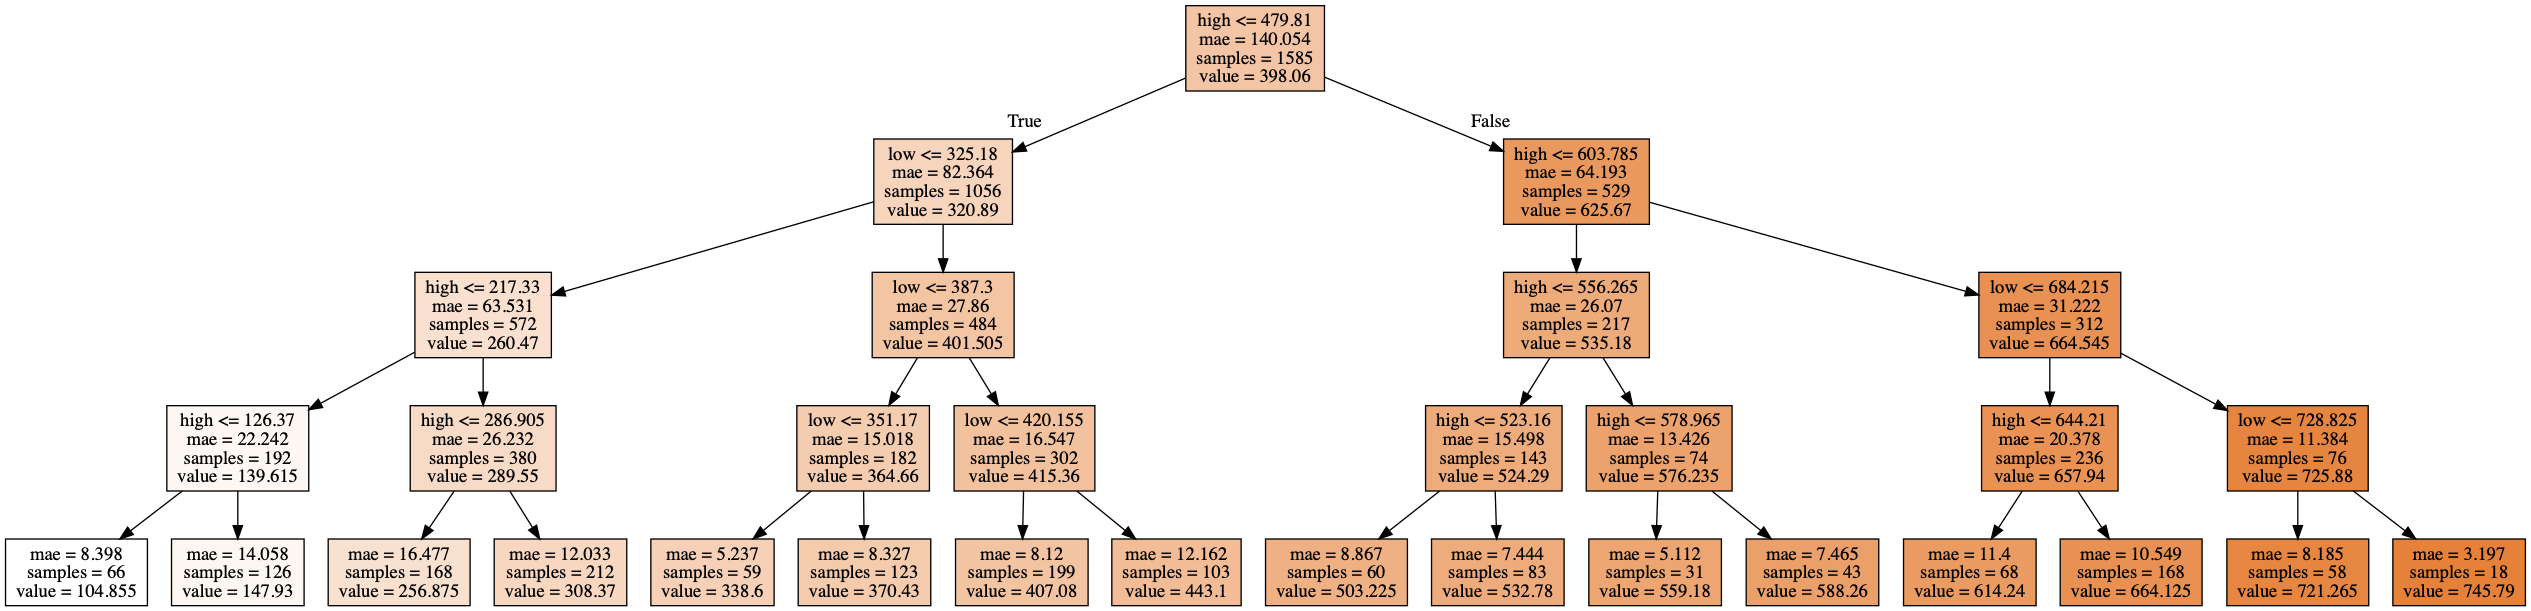

In [340]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeRegressor(
    criterion='mae',
    max_features=2,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X_train, Y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())